No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


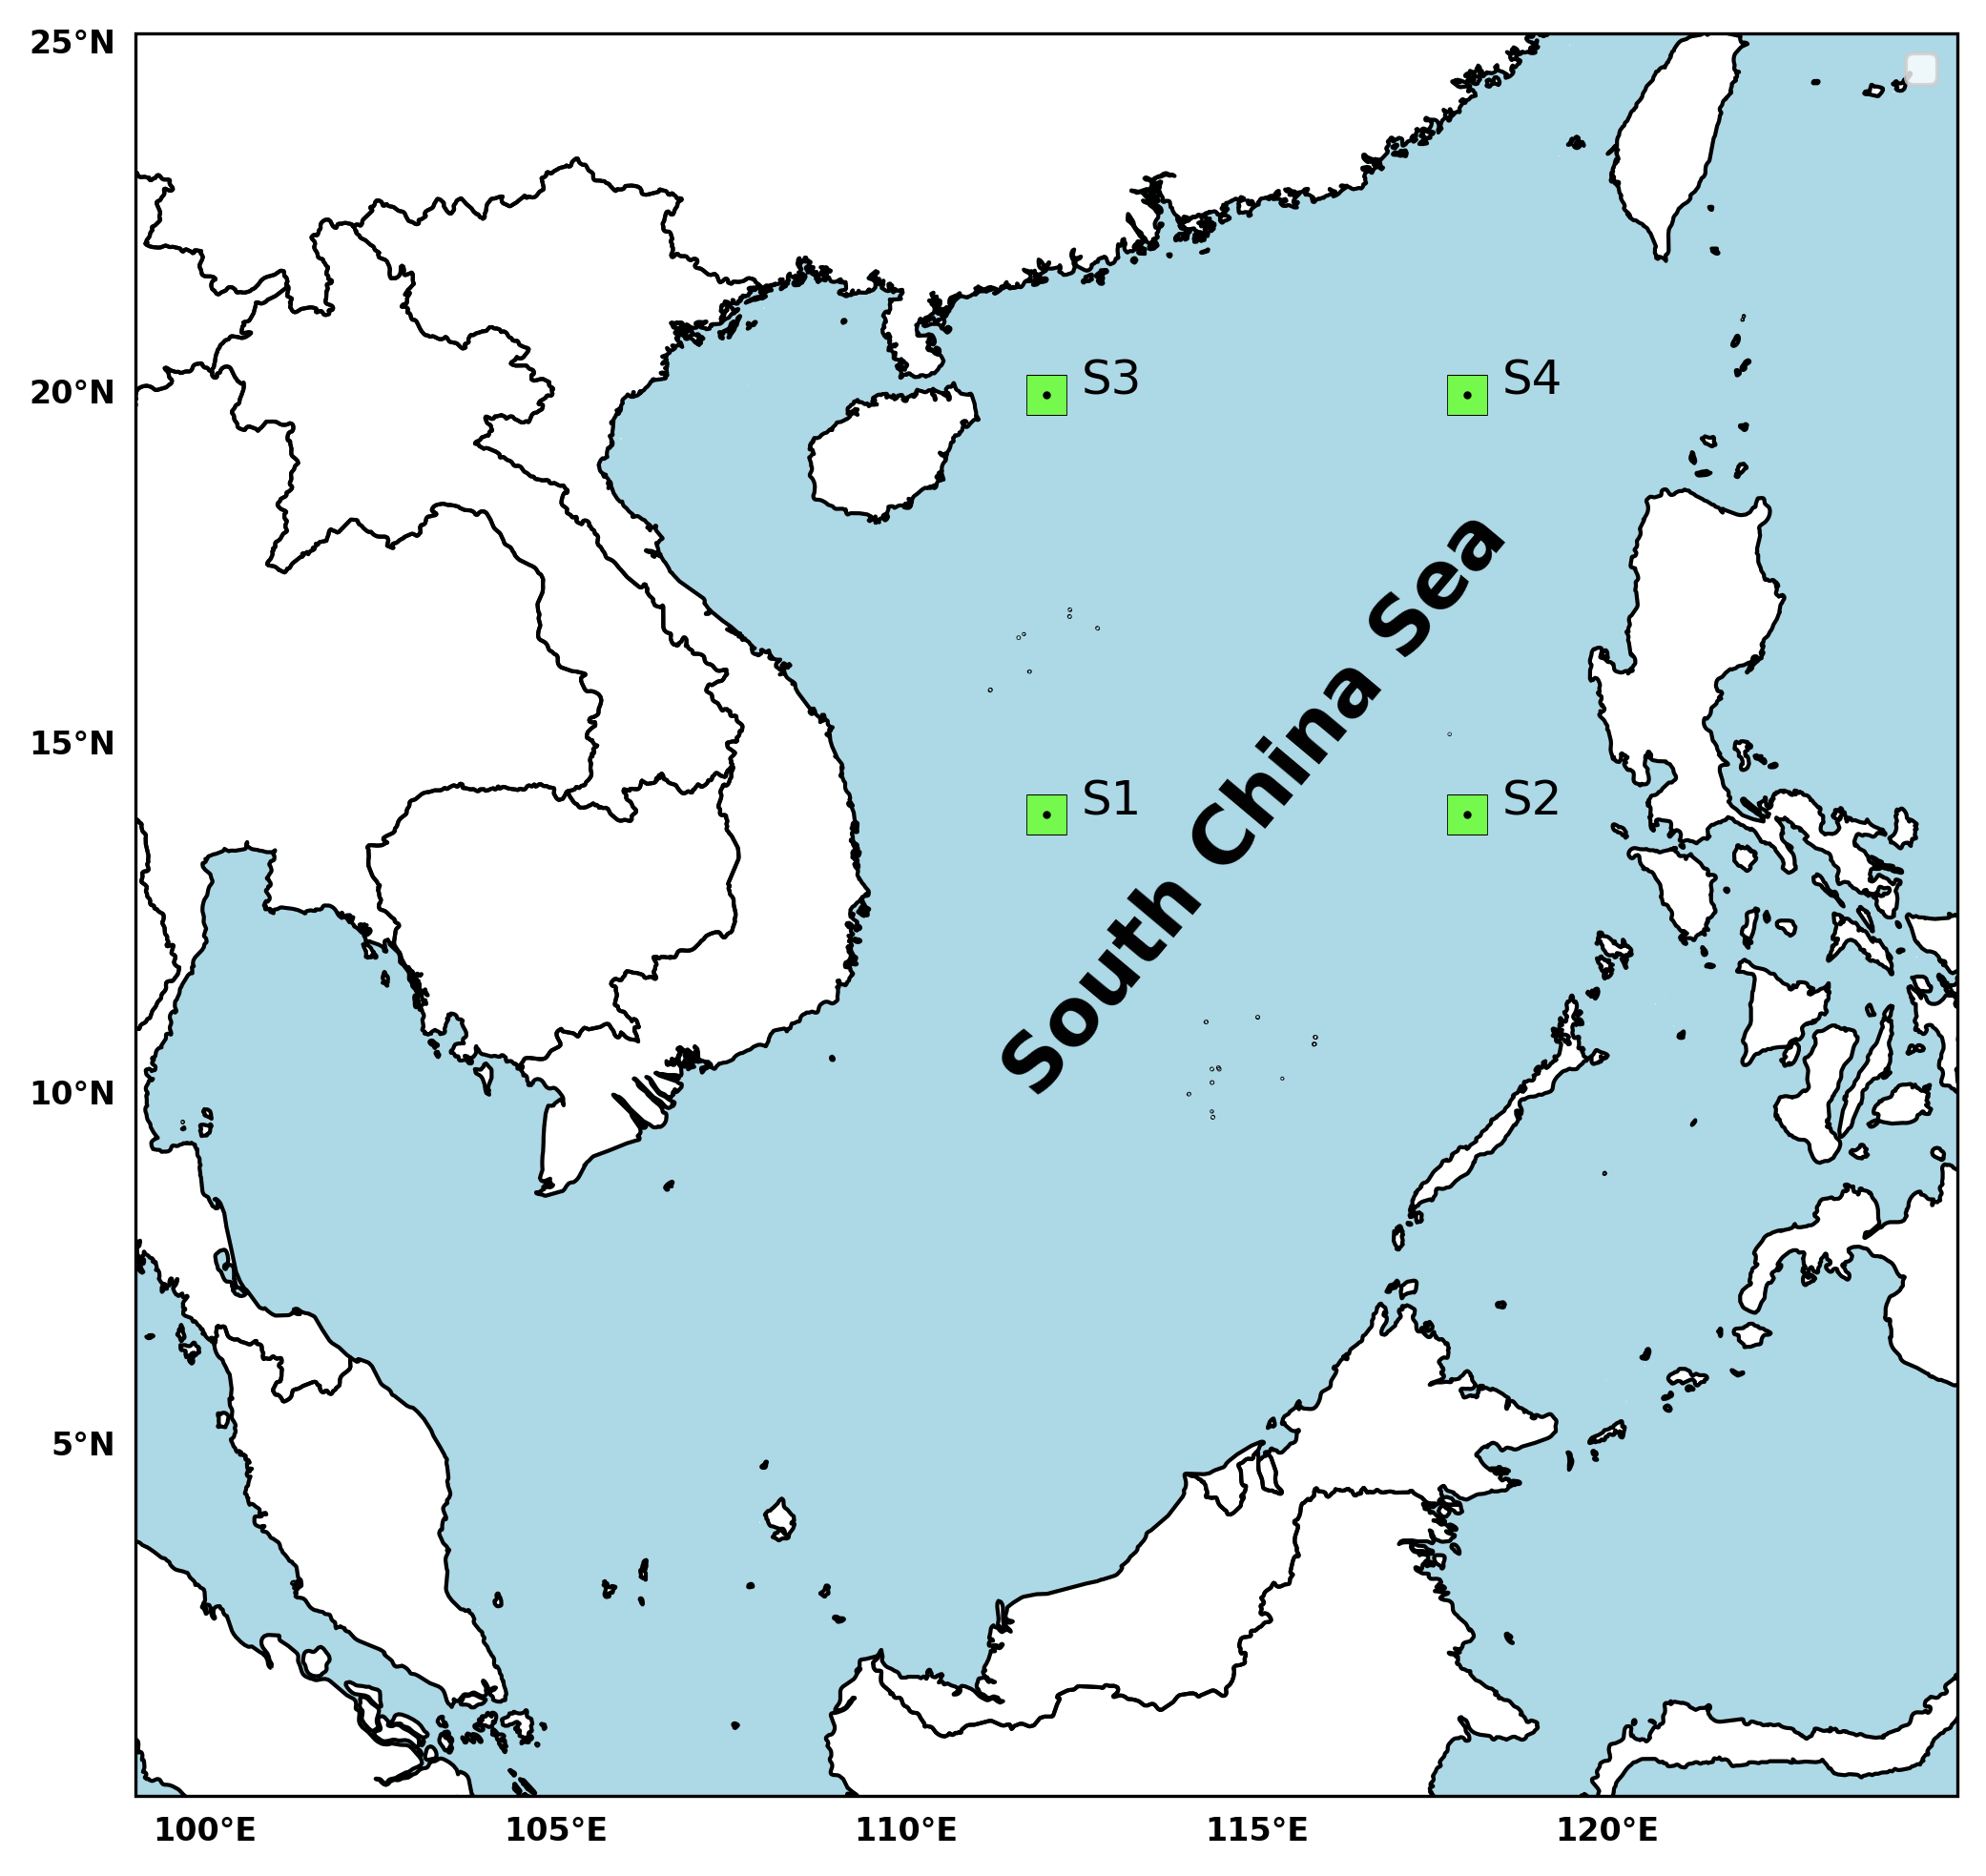

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# 设置经纬度范围
extent = [99, 125, 0, 25]

# 创建地图画布
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=300)

# 设置显示范围
ax.set_extent(extent)

# 添加陆地，填充白色
land = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='face',
                                    facecolor='white')
ax.add_feature(land)

# 添加海洋，填充浅蓝色
sea = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                   edgecolor='face',
                                   facecolor='lightblue')
ax.add_feature(sea)


# 添加国家边界和国家名称
shapefile_path = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m',
                                            edgecolor='black',
                                            facecolor='none')
ax.add_feature(shapefile_path)



# # 设置经纬度刻度在左边和底部显示
# ax.set_xticks([100, 105, 110, 115, 120, 125], crs=ccrs.PlateCarree())
# ax.set_yticks([0, 5, 10, 15, 20, 25], crs=ccrs.PlateCarree())
# ax.xaxis.set_tick_params(labelsize=10)
# ax.yaxis.set_tick_params(labelsize=10)
# ax.xaxis.tick_bottom()
# ax.yaxis.tick_left()
gls = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), 
                   color='k', linestyle='dashed', linewidth=0, 
                   y_inline=False, x_inline=False,
                   rotate_labels=0, xpadding=5,
                   xlocs=range(-180,180,5), ylocs=range(-90,90,5),
                   xlabel_style={"size":8,"weight":"bold"},
                   ylabel_style={"size":8,"weight":"bold"}
                  )
gls.top_labels = False                      
gls.right_labels = False

# 锚点经纬度和描述
locations = [
    (112, 14, "S1"),
    (118, 14, "S2"),
    (112, 20, "S3"),
    (118, 20, "S4")
]

# 添加锚点和描述
for lon, lat, name in locations:
    ax.plot(lon, lat, marker='s', color='#74f94c', markersize=10, transform=ccrs.PlateCarree(), markeredgecolor='black', markeredgewidth=0.2)
    ax.plot(lon, lat, 'ko', markersize=1, transform=ccrs.PlateCarree())  # 'ko' 代表黑色 ('k') 圆点 ('o')
    ax.text(lon + 0.5, lat, name, fontsize=12, transform=ccrs.Geodetic())

# 在海域中添加文字
ax.text(115, 10, "South China Sea", fontsize=20, transform=ccrs.Geodetic(), color='black', ha='center', weight='bold', rotation=50)



# # 添加比例尺和指北针
# # 注意：Cartopy没有内置的比例尺或指北针工具，需要手动添加或使用额外的库
# # 这里提供的只是示例，可能需要根据地图的具体尺寸调整位置和大小
# ax.plot([extent[0] + 1, extent[0] + 2], [extent[2] + 1, extent[2] + 1], color='black', linewidth=5, transform=ccrs.Geodetic())
# ax.text(extent[0] + 1.5, extent[2] + 1.1, '100 km', horizontalalignment='center', transform=ccrs.Geodetic())
# ax.arrow(extent[0] + 1, extent[2] + 2, 0, 1, color='black', 
#          transform=ccrs.Geodetic(), width=0.05, head_width=0.15, head_length=0.1, length_includes_head=True)
# ax.text(extent[0] + 1, extent[2] + 3.2, 'N', horizontalalignment='center', transform=ccrs.Geodetic())

plt.legend()
plt.show()

In [1]:
# import geopandas as gpd 
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# import gma.map.plot as mpt


# # 创建地图投影
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# # 添加中国南海区域
# ax.set_extent([99, 125, 0, 25])  # 经度范围：105至125，纬度范围：0至25

# # 添加海岸线、边界和陆地
# ax.add_feature(cfeature.COASTLINE)
# # ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAND, color='white')  # 大陆区域填充白色
# ax.add_feature(cfeature.OCEAN, color='#b0d8ff')  # 海洋区域填充浅蓝色


# gls = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), 
#                    color='k', linestyle='dashed', linewidth=0.3, 
#                    y_inline=False, x_inline=False,
#                    rotate_labels=0,xpadding=5,
#                    xlocs=range(-180,180,10), ylocs=range(-90,90,10),
#                    xlabel_style={"size":8,"weight":"bold"},
#                    ylabel_style={"size":8,"weight":"bold"}
#                   )
# gls.top_labels= False                      
# gls.right_labels=False

# # 初始化地图框，并添加一个图层
# MapF = mpt.MapFrame(Axes = ax, BaseMapProj = ccrs.PlateCarree(), Extent = [99, 0, 125, 25])

# ## n.1 添加指北针
# MapF.AddCompass(LOC = (0.07, 0.86), FontSize = 8)
# ## n.2 添加比例尺
# MapF.AddScaleBar(LOC = (0.2, 0.05), FontSize = 6)

# plt.tight_layout()

# # 显示地图
# plt.show()